In [1]:
import pandas as pd
from datasets import load_dataset

dataset = load_dataset('lukebarousse/data_jobs') 
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

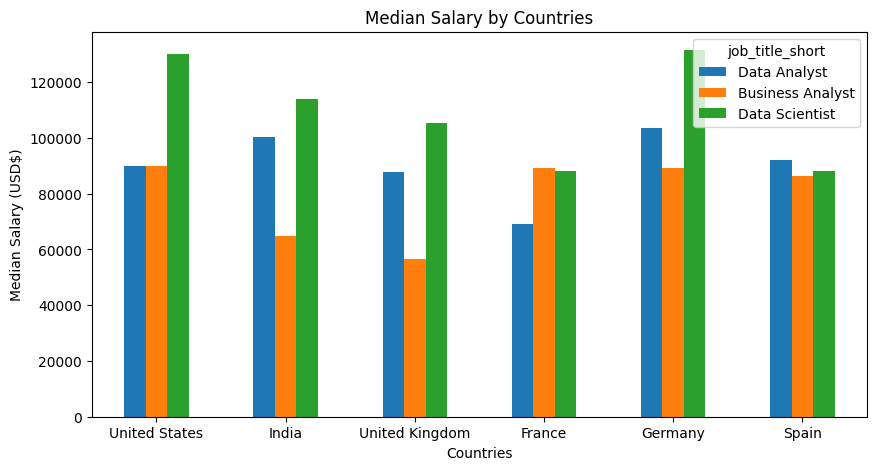

In [ ]:
import matplotlib.pyplot as plt

top_countries = df['job_country'].value_counts().head(6).index
job_titles = ['Data Analyst', 'Business Analyst', 'Data Scientist']

df_job_country_salary = df.pivot_table(
    values='salary_year_avg',
    index='job_country',
    columns='job_title_short',
    aggfunc='median'
)

df_job_country_salary = df_job_country_salary.loc[top_countries]

df_job_country_salary = df_job_country_salary[job_titles]

fig, ax = plt.subplots(figsize=(10, 5))

df_job_country_salary.plot(kind='bar', ax=ax)

plt.xlabel('Countries')
plt.ylabel('Median Salary (USD$)')
plt.title('Median Salary by Countries')
plt.xticks(rotation=0, ha='center')
plt.show()